In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
print(tf.__version__)

2.0.0


## Listing 2.1 Loading the MNIST dataset in Keras

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Listing 2.6 Displaying the fourth digit

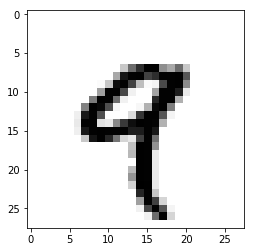

In [5]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [9]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
train_labels[0]

5

## Listing 2.2 The network architecture

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

## Listing 2.3 The compilation step

In [12]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Listing 2.4 Preparing the image data

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Listing 2.5 Preparing the labels

In [14]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Using TensorFlow backend.


In [16]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2578 - accuracy: 0.9247
Epoch 2/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1054 - accuracy: 0.9687
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0687 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0488 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0368 - accuracy: 0.9887


In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test_acc: 0.9794


# Fashion MNIST Data Loading


In [19]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


In [21]:
training_images  = training_images / 255.0
test_images = test_images / 255.0


In [22]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [23]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5035 - accuracy: 0.8220
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3780 - accuracy: 0.8628
Epoch 3/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3390 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3160 - accuracy: 0.8844
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2947 - accuracy: 0.8909
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2843 - accuracy: 0.8950
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2703 - accuracy: 0.8998
Epoch 8/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2597 - accuracy: 0.9047
Epoch 9/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2496 - accuracy: 0.9061
Epoch 10/10
60

In [24]:
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3351927441120148, 0.8848]

In [25]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),                                     tf.keras.layers.Dense(512, activation=tf.nn.relu),                           tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs=5, batch_size=128)
model.evaluate(test_images, test_labels)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4989 - accuracy: 0.8251
Epoch 2/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3723 - accuracy: 0.8666
Epoch 3/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3318 - accuracy: 0.8805
Epoch 4/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3052 - accuracy: 0.8875
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2853 - accuracy: 0.8951
10000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.34802136933803557, 0.8746]